In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 


In [25]:
df=pd.read_csv('student_scores.csv')

In [26]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [27]:
len(df)

25

In [28]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [29]:
X=df['Hours']
y=df['Scores']

<Axes: xlabel='Hours', ylabel='Scores'>

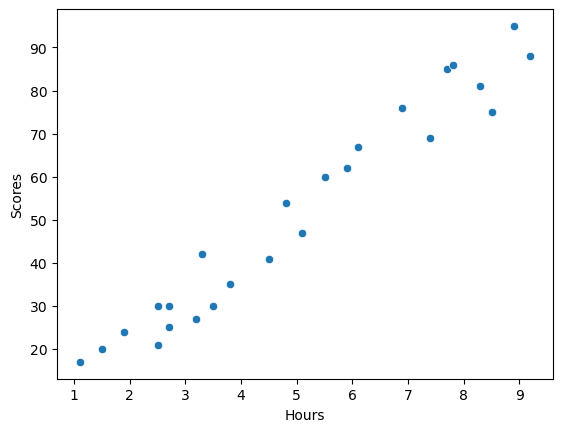

In [30]:
sns.scatterplot(x=X,y=y,data=df)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [33]:
from sklearn.linear_model import  LinearRegression

In [34]:
linear_model=LinearRegression()

In [35]:
linear_model.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [36]:
test_pred=linear_model.predict(X_test.values.reshape(-1,1))

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [38]:
print('MAE',mean_absolute_error(y_test,test_pred))

MAE 5.864954643694258


In [39]:
print('RSME',np.sqrt(mean_squared_error(y_test,test_pred)))

RSME 6.452508476982333


In [40]:
residuals=y_test-test_pred

In [41]:
residuals

16     2.981218
10     6.155338
22    -4.975252
19    -6.854708
7      3.081672
21     4.058233
2     -6.995343
3    -11.817875
Name: Scores, dtype: float64

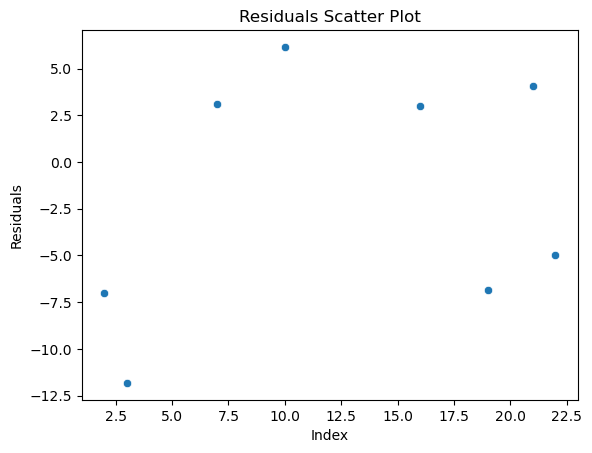

In [42]:
sns.scatterplot(x=residuals.index, y=residuals.values)
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals Scatter Plot')
plt.show()

In [43]:
R2=r2_score(y_test,test_pred)

In [44]:
R2

0.8999124290533055

In [74]:
def clip_hours(hrs):
    return max(0, min(9.8998, hrs))


In [75]:
hrs=12
actual_hrs=clip_hours(hrs)
print(f"Student study in hrs:{actual_hrs} and his/her score in {linear_model.predict([[actual_hrs]])} from 0 to 100")

Student study in hrs:9.8998 and his/her score in [100.76900301] from 0 to 100
